In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import OPTICS
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('../../EDA/result3.csv')
df['location_count'] = df['location'].apply(lambda x: len(eval(x)))
df.drop('location',axis=1, inplace=True)
df

,programming language,tiobe index ratings,job amount,average salary,linkedin skill,avg wiki views (monthly),github user count,average search count,stack overflow count,location_count
0,Java,10.51,728,6.153528e+06,103000,3925.598214,6800,28.133930,2531,12
1,JavaScript,3.54,1111,6.168157e+06,118000,5276.794643,11400,15.482143,4633,12
2,Dart,0.56,32,6.250161e+06,945,52.953846,877,37.000000,963,6
3,Node.js,0.00,450,5.596209e+06,34000,662.803571,-1,2.633929,2207,8
4,PHP,1.21,505,5.762279e+06,123000,4083.750000,8600,26.616071,3147,11
...,...,...,...,...,...,...,...,...,...,...
170,Dc,0.00,1,5.592859e+06,0,-1.000000,-1,0.000000,0,1
171,VBScript,0.33,2,3.327448e+06,692,175.750000,-1,21.366070,0,1
172,CORAL,0.00,1,3.244448e+06,0,-1.000000,-1,0.000000,0,1
173,UniVerse,0.00,1,1.520833e+06,0,-1.000000,-1,0.000000,0,1


In [3]:
# standardize the data
scaler = StandardScaler()
df[['tiobe index ratings_T','job amount_T','average salary_T','linkedin skill_T',
    	'avg wiki views (monthly)_T','github user count_T','average search count_T',
        'stack overflow count_T','location_count_T']] = scaler.fit_transform(df[['tiobe index ratings','job amount',
        'average salary','linkedin skill',
    	'avg wiki views (monthly)','github user count','average search count',
        'stack overflow count','location_count']])

features_scaled = df[['tiobe index ratings_T','job amount_T','average salary_T','linkedin skill_T',
    	'avg wiki views (monthly)_T','github user count_T','average search count_T',
        'stack overflow count_T','location_count_T']]

In [5]:
min_samples_values = [2, 3, 5]
max_eps_values = [2.0, 3.0, 4.0, 5.0, 5.5, 6.0, 6.5, 20.0, 30.0, 50.0]

best_score = -1
best_params = (None, None)

for min_samples in min_samples_values:
    for max_eps in max_eps_values:
        optics = OPTICS(min_samples=min_samples, max_eps=max_eps)
        optics.fit(features_scaled)

        if len(set(optics.labels_)) > 1:  
            score = silhouette_score(features_scaled, optics.labels_)
            print(f"min_samples={min_samples}, max_eps={max_eps}, silhouette_score={score}")
            
            if score > best_score:
                best_score = score
                best_params = (min_samples, max_eps)

print(f"Best parameters: min_samples={best_params[0]}, max_eps={best_params[1]}, silhouette_score={best_score}")


c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


min_samples=2, max_eps=2.0, silhouette_score=0.1819178706589602
min_samples=2, max_eps=3.0, silhouette_score=0.2058535554794463


c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


min_samples=2, max_eps=4.0, silhouette_score=0.2058535554794463
min_samples=2, max_eps=5.0, silhouette_score=0.21362452788264746


c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


min_samples=2, max_eps=5.5, silhouette_score=0.22388374151793553
min_samples=2, max_eps=6.0, silhouette_score=0.2306627379433613


c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


min_samples=2, max_eps=6.5, silhouette_score=0.2306627379433613
min_samples=2, max_eps=20.0, silhouette_score=0.2306627379433613


c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


min_samples=2, max_eps=30.0, silhouette_score=0.2306627379433613
min_samples=2, max_eps=50.0, silhouette_score=0.2306627379433613


c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


min_samples=3, max_eps=2.0, silhouette_score=0.07207417902560945
min_samples=3, max_eps=3.0, silhouette_score=0.07207417902560945


c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


min_samples=3, max_eps=4.0, silhouette_score=0.07207417902560945
min_samples=3, max_eps=5.0, silhouette_score=0.07207417902560945


c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


min_samples=3, max_eps=5.5, silhouette_score=0.07207417902560945
min_samples=3, max_eps=6.0, silhouette_score=0.09647470390896654


c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


min_samples=3, max_eps=6.5, silhouette_score=0.08965080135853053
min_samples=3, max_eps=20.0, silhouette_score=0.08965080135853053


c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


min_samples=3, max_eps=30.0, silhouette_score=0.08965080135853053


c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


min_samples=3, max_eps=50.0, silhouette_score=0.08965080135853053
min_samples=5, max_eps=2.0, silhouette_score=-0.14823900966583017


c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


min_samples=5, max_eps=3.0, silhouette_score=-0.14823900966583017
min_samples=5, max_eps=4.0, silhouette_score=-0.14823900966583017


c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


min_samples=5, max_eps=5.0, silhouette_score=-0.14823900966583017
min_samples=5, max_eps=5.5, silhouette_score=-0.14823900966583017


c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


min_samples=5, max_eps=6.0, silhouette_score=-0.14823900966583017
min_samples=5, max_eps=6.5, silhouette_score=-0.13853751810598047


c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


min_samples=5, max_eps=20.0, silhouette_score=-0.13853751810598047
min_samples=5, max_eps=30.0, silhouette_score=-0.13853751810598047
min_samples=5, max_eps=50.0, silhouette_score=-0.13853751810598047
Best parameters: min_samples=2, max_eps=6.0, silhouette_score=0.2306627379433613


c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


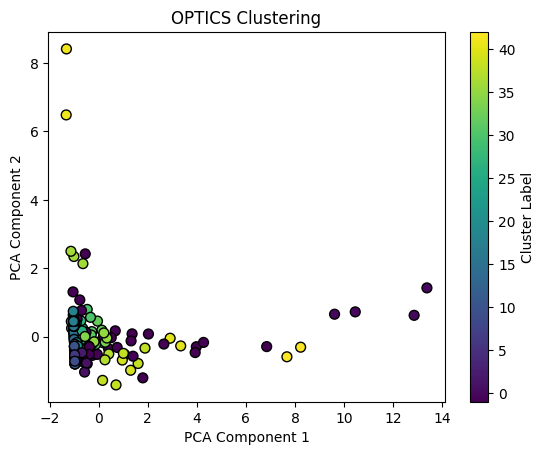

In [13]:
optics = OPTICS(min_samples=2, max_eps=6.0)  
optics_labels = optics.fit_predict(features_scaled)

features_with_optics_labels = features_scaled.copy()
features_with_optics_labels['optics_cluster'] = optics_labels

pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features_scaled)

plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=optics_labels, cmap='viridis', s=50, edgecolor='k')
plt.title("OPTICS Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster Label")
plt.show()

In [14]:
unique_winners = np.unique(optics_labels, axis=0)
num_clusters = len(unique_winners)
print(f"Number of clusters: {num_clusters}")
# overfitting

Number of clusters: 44


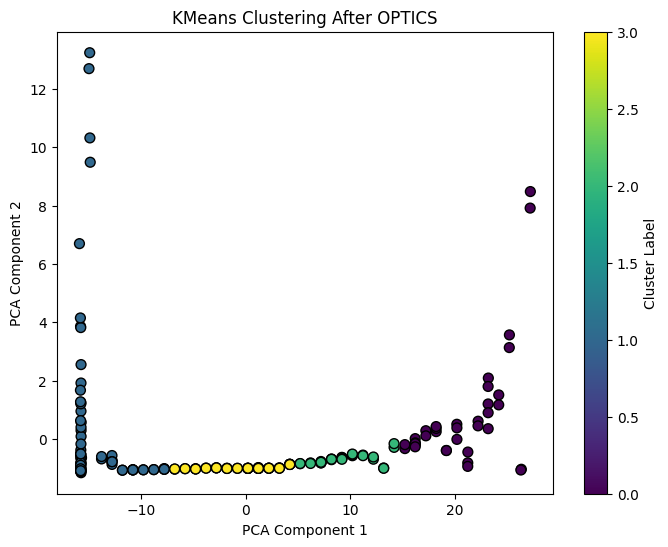

In [15]:
kmeans = KMeans(n_clusters=4)  
kmeans_labels = kmeans.fit_predict(features_with_optics_labels)

pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features_with_optics_labels)

plt.figure(figsize=(8, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=kmeans_labels, cmap='viridis', s=50, edgecolor='k')
plt.title("KMeans Clustering After OPTICS")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster Label")
plt.show()

In [16]:
silhouette = silhouette_score(features_scaled, kmeans_labels)
print(f"Silhouette Score for KMeans clustering: {silhouette}")

Silhouette Score for KMeans clustering: -0.13373037706218596
